In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                      
import matplotlib.pyplot as plt             

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("DefualtData/UCI_Credit_card.csv")

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


ID: ID of each client<br>
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)<br>
SEX: Gender (1=male, 2=female)<br>
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)<br>
MARRIAGE: Marital status (1=married, 2=single, 3=others)<br>
AGE: Age in years<br>
PAY_0: Repayment status in September, 2005 (-2 = No consumption,-1=pay duly, 0 = revolving credit, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)<br>
PAY_2: Repayment status in August, 2005 (scale same as above)<br>
PAY_3: Repayment status in July, 2005 (scale same as above)<br>
PAY_4: Repayment status in June, 2005 (scale same as above)<br>
PAY_5: Repayment status in May, 2005 (scale same as above)<br>
PAY_6: Repayment status in April, 2005 (scale same as above)<br>
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)<br>
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)<br>
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)<br>
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)<br>
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)<br>
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)<br>
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)<br>
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)<br>
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)<br>
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)<br>
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)<br>
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)<br>
default.payment.next.month: Default payment (1=yes, 0=no)

In [4]:
df.shape

(30000, 25)

In [5]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [8]:
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default.payment.next.month        2
dtype: int64

There are 30,000 entries/rows with 25 columns.<br> 
Categorical data falls under int64 while numerical data falls under float64.<br>
First 6 columns are straight foward. Pay 0,2-6 corresponde to Repayment status from Setember since April. -1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above.<br>
BILL_AMT 1-6 indicates the ammount in each statement Setember since April.<br>
PAY_AMT 1-6 indicates the ammount payed in the previous payment.<br>
default.payment.next.month indicates whether or not the account ended up defualting or not in October.<br>

Cleaning Data

In [9]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [10]:
df.duplicated().sum()

0

No missing/null values
No duplicated values

In [11]:
#Rename columns to make pay align with bill & pay atm, and default to be shorter
df = df.rename(columns={"PAY_0":"PAY_1","default.payment.next.month":"default"})
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [12]:
#Remove redunancies/combine areas that can fall under one category
df['EDUCATION'] = df['EDUCATION'].replace([6,5,0],4)
#df['MARRIAGE'] = df['MARRIAGE'].replace(0,3)

Relationship Analysis

<Axes: >

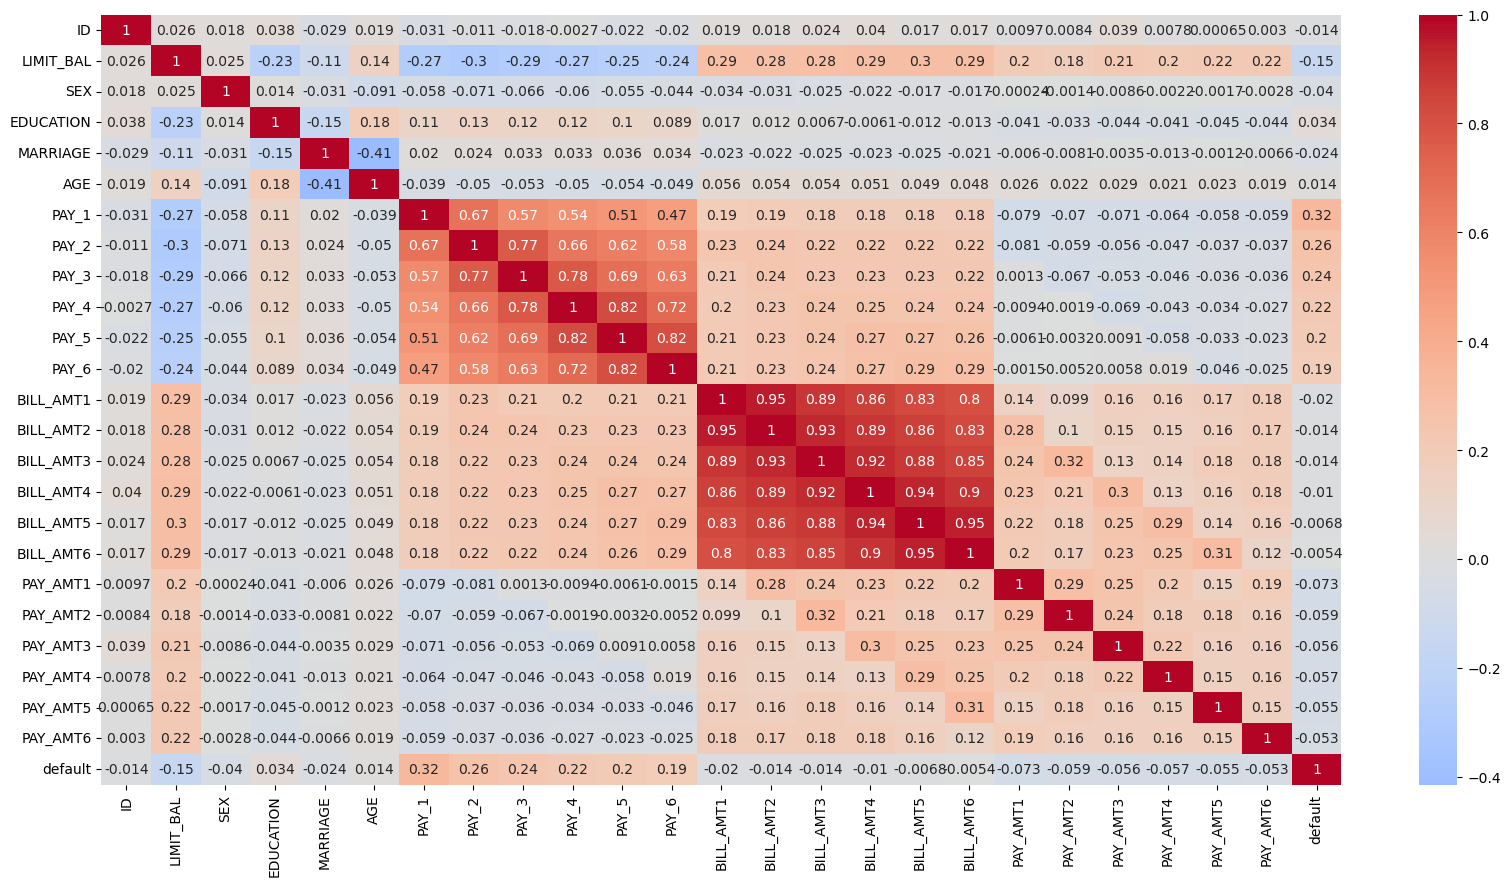

In [13]:
#Heatmap
correlation = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(correlation, cmap='coolwarm', annot=True, center=0)

Highest level of correlation to defualting is arround the Payment status. This is more correlated as it gets closer to the October due date.<br>
Limit on balance is correlated with the bill statement and how much gets payed for obvious reasons. Limit on balance does not influence the likelyhood of repayment.<br>
High correlation between Bill Ammount due, spending rate stays level.<br>
High correlation between payment statusses across months.<br>

Demographics Wise:<br>
Education and age could be important. Marital status and geneder might also have a smaller correlation.

In [14]:
#sns.pairplot(df)

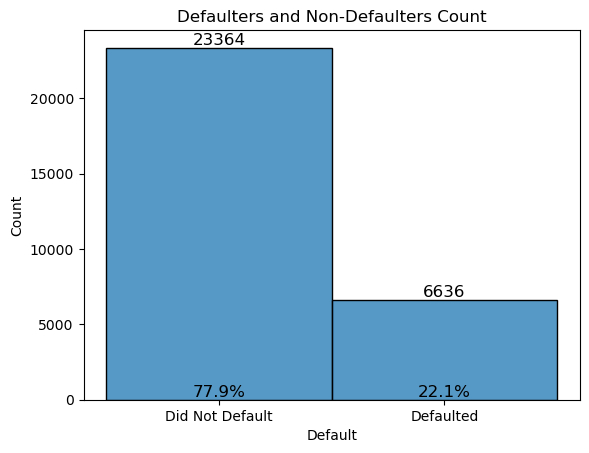

In [15]:
ax = sns.histplot(df['default'], bins=2, discrete=True)
plt.title("Defaulters and Non-Defaulters Count")
plt.xlabel("Default")
plt.ylabel("Count")
plt.xticks([0, 1], ['Did Not Default', 'Defaulted'])
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=12)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / len(df))
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., 0), ha='center', va='bottom', fontsize=12)


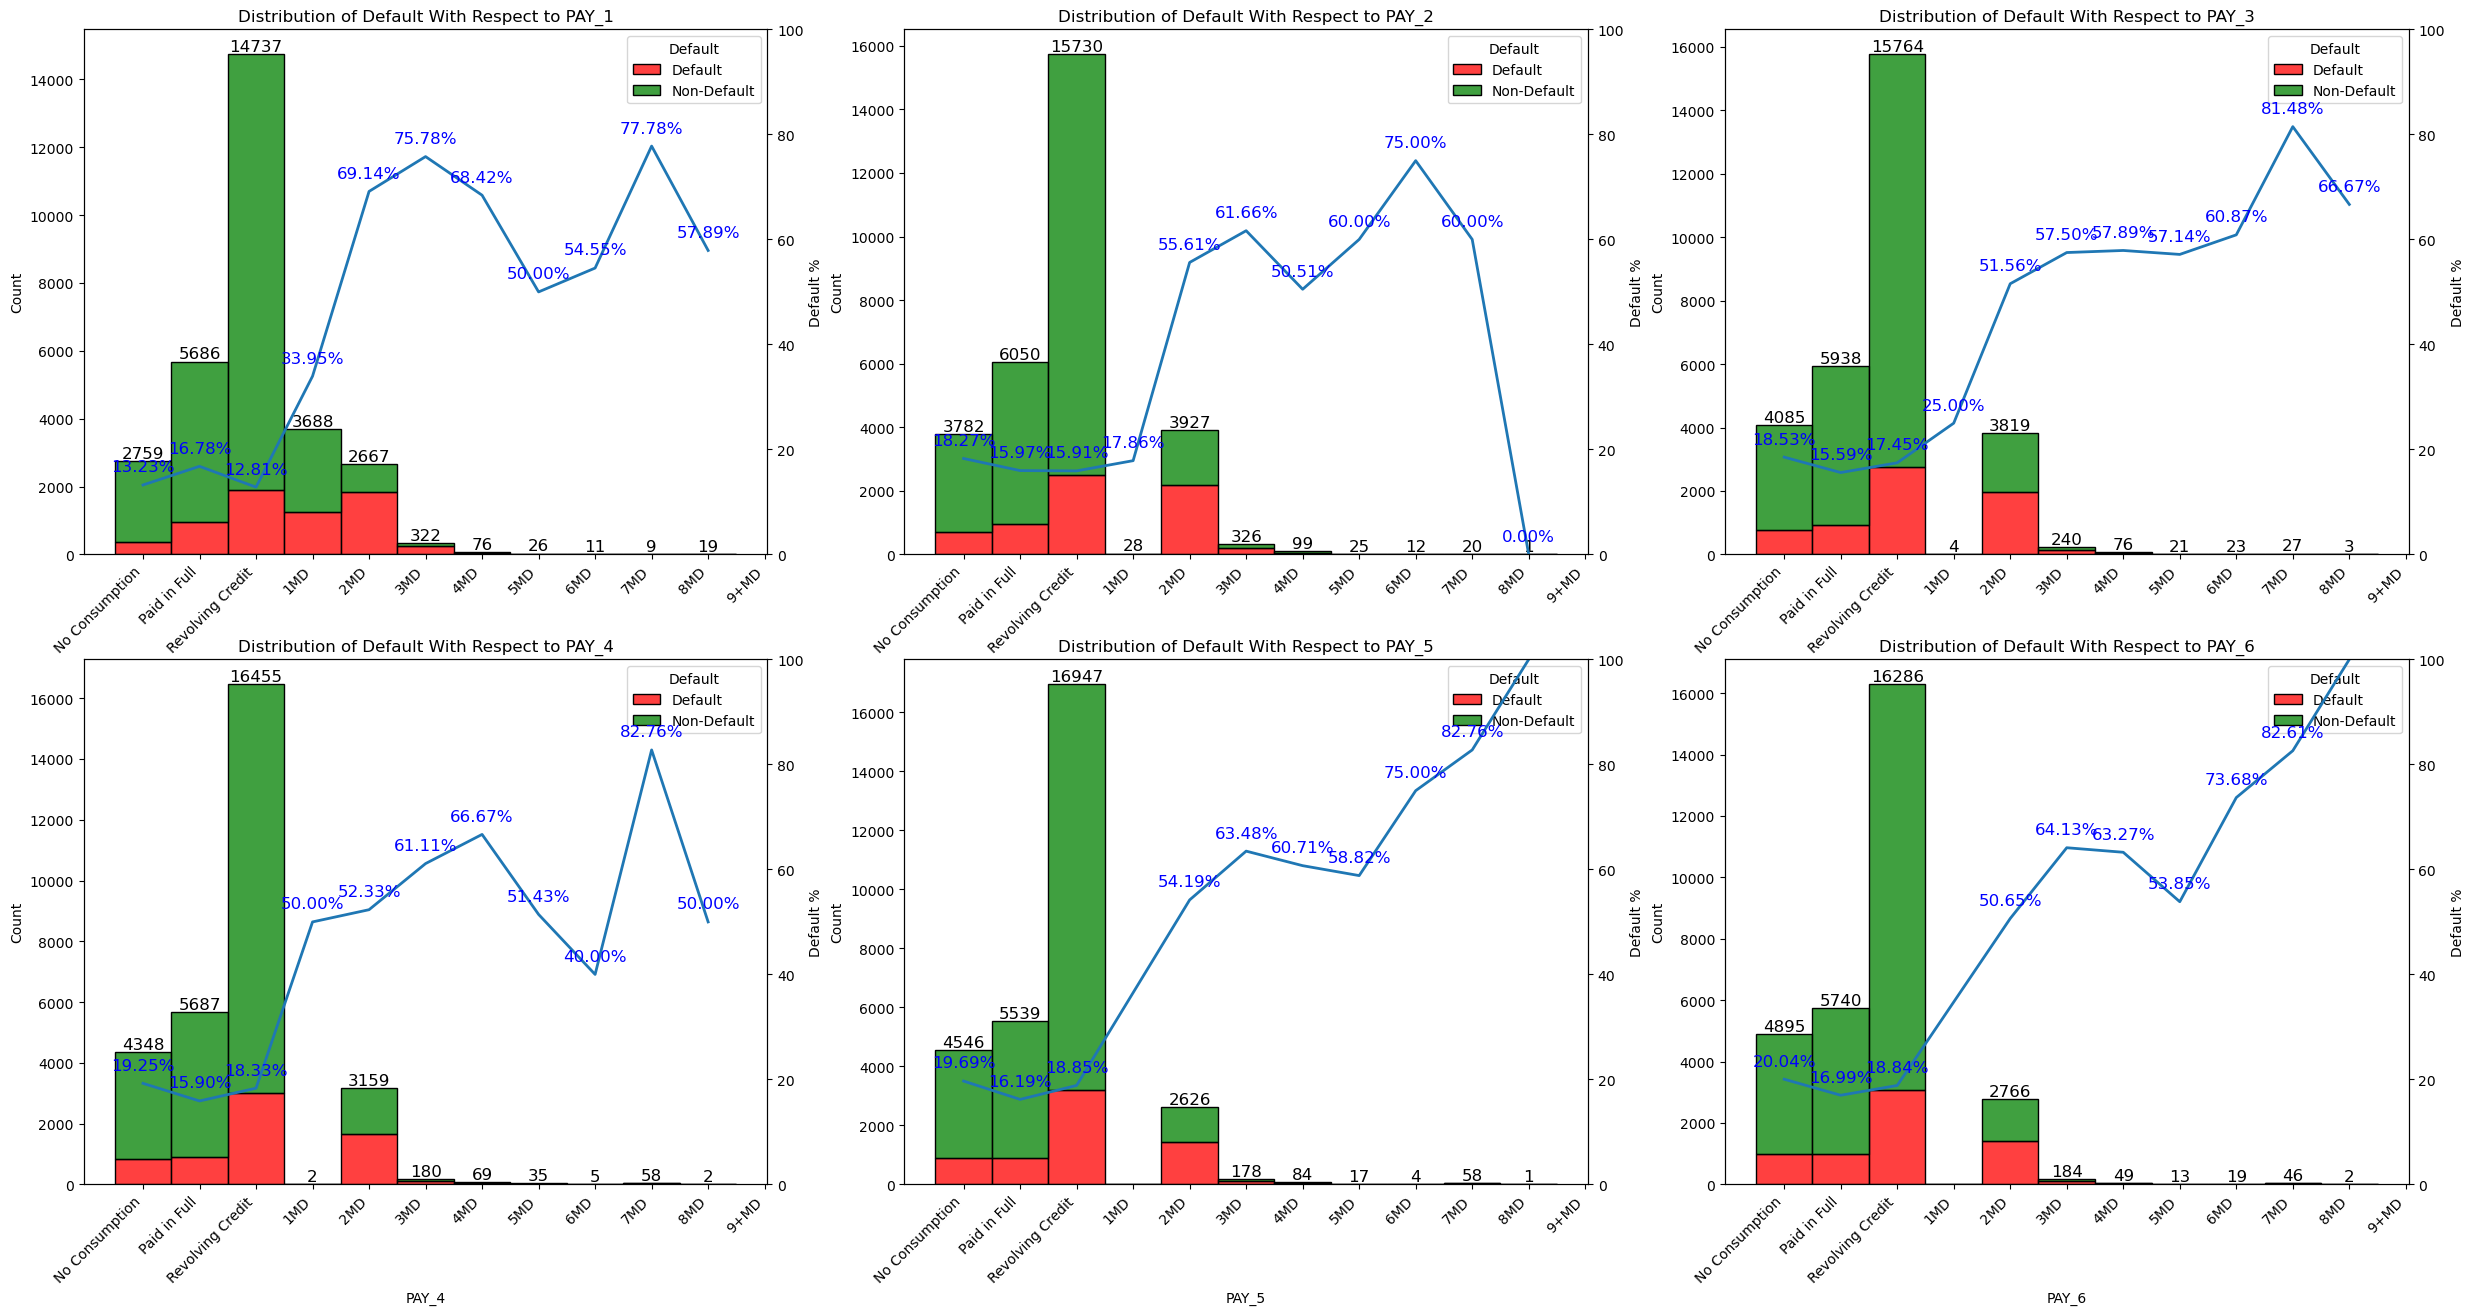

In [16]:
fig, axes = plt.subplots(2, 3, figsize=(30, 15))
axes = axes.flatten()
payment_status_columns = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for i, col in enumerate(payment_status_columns):
    ax = sns.histplot(data=df, x=col,hue='default', multiple="stack", palette=['green', 'red'], discrete=True, ax=axes[i])
    ax.set_title(f"Distribution of Default With Respect to {col}")
    ax.legend(title='Default', labels=['Default', 'Non-Default'])

    ax.set_xticks([-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    ax.set_xticklabels(['No Consumption','Paid in Full','Revolving Credit', '1MD', '2MD','3MD','4MD','5MD','6MD', '7MD','8MD','9+MD'])
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_ha('right')
    
    #Iterate Through total payment situations
    grouped = df.groupby(col).size()
    for x_val, total in grouped.items():
        ax.annotate(str(total), (x_val, total), ha='center', va='bottom', fontsize=12)
    
    #Iterate Through Percentages and turn into line Chart
    grouped_percentages = df.groupby([col, 'default']).size().unstack(fill_value=0)
    x_vals = grouped_percentages.index.tolist()
    percentages = [(grouped_percentages.loc[x][1] / grouped_percentages.loc[x].sum()) * 100 if grouped_percentages.loc[x].sum() > 0 else 0 for x in x_vals]

    ax2 = ax.twinx()
    ax2.plot(x_vals, percentages, linewidth=2, label ='Default Percentage')
    ax2.set_ylabel('Default %')
    ax2.set_ylim(0, 100)

    for x, pct in zip(x_vals, percentages):
        ax2.annotate(f'{pct:.2f}%',(x,pct + 2), ha='center', va='bottom', fontsize='12', color='blue')


Those who pay in full each month tend to have the lowest rate of followed by those who are using revolving credit and then those who do not use their credit cards. This is true for all aside from Setember (PAY_1), since not spending before October means they can pay it back in full with ease.

Those who have even 1 month worth of backed up payments in any month immediatly have a much higher rate of paying defaults late. This ascends higher for 2 and 3 month. 

Although the rate goes back down for those with payment delay of 4 Tor more days, but this could be due to the low data size for those months. Generally however, as the delay in months goes up, the higher the rate of defaulting goes. 

More knowledge about credit, payments, and defaulting can be helpful here to fully draw out meaningful interpretations.

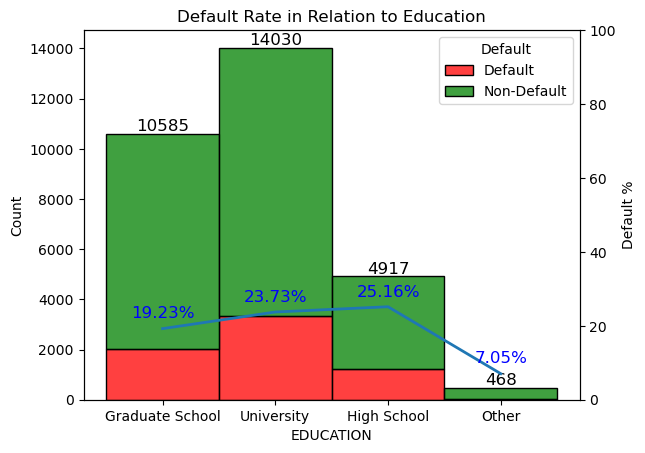

In [17]:
ax = sns.histplot(data=df, x='EDUCATION',hue='default', multiple="stack", palette=['green', 'red'], discrete=True)
ax.set_title("Default Rate in Relation to Education")
ax.legend(title='Default', labels=['Default', 'Non-Default'])
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(['Graduate School', 'University', 'High School', 'Other'])

grouped = df.groupby('EDUCATION').size()
for x_val, total in grouped.items():
    ax.annotate(str(total), (x_val, total), ha='center',va='bottom', fontsize='12')

grouped_percentages = df.groupby(['EDUCATION', 'default']).size().unstack(fill_value=0)
x_vals = grouped_percentages.index.tolist()
percentages = [(grouped_percentages.loc[x][1] / grouped_percentages.loc[x].sum()) * 100 if grouped_percentages.loc[x].sum() > 0 else 0 for x in x_vals]

ax2 = ax.twinx()
ax2.plot(x_vals, percentages, linewidth=2, label ='Default Percentage')
ax2.set_ylabel('Default %')
ax2.set_ylim(0, 100)

for x, pct in zip(x_vals, percentages):
        ax2.annotate(f'{pct:.2f}%',(x,pct + 2), ha='center', va='bottom', fontsize='12', color='blue')

Higher Level of attained Education has a negative correlation to default rate.

C:\Users\manch\AppData\Local\Temp\ipykernel_11708\149961804.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('AGE_binned').size()
C:\Users\manch\AppData\Local\Temp\ipykernel_11708\149961804.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_percentages = df.groupby(['AGE_binned', 'default']).size().unstack(fill_value=0)


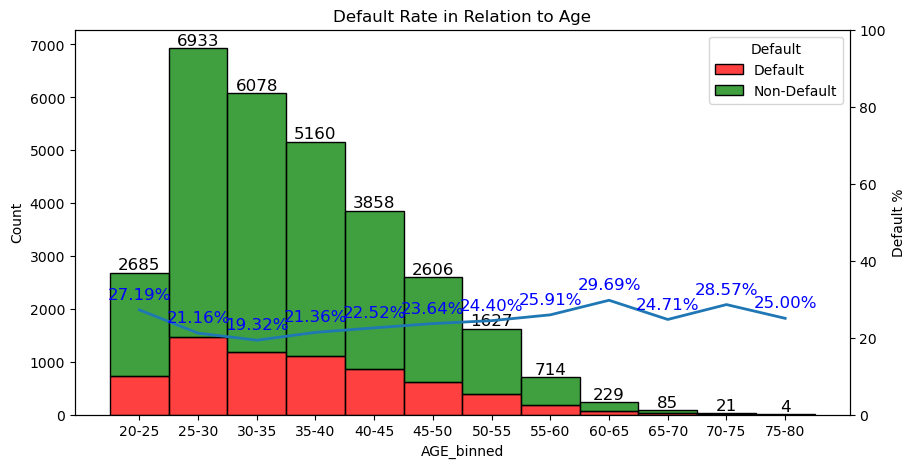

In [18]:
plt.figure(figsize=(10,5))
bins = np.arange(20, 85, 5)
df['AGE_binned'] = pd.cut(df['AGE'], bins=bins, right=False, labels=[f'{i}-{i+5}' for i in bins[:-1]])
ax = sns.histplot(data=df, x='AGE_binned', hue='default', multiple="stack", bins=bins, palette=['green', 'red'], discrete=True)
ax.set_title("Default Rate in Relation to Age")
ax.legend(title='Default', labels=['Default', 'Non-Default'])

grouped = df.groupby('AGE_binned').size()
for x_val, total in grouped.items():
    ax.annotate(str(total), (x_val, total), ha='center',va='bottom', fontsize='12')

grouped_percentages = df.groupby(['AGE_binned', 'default']).size().unstack(fill_value=0)
x_vals = grouped_percentages.index.tolist()
percentages = [(grouped_percentages.loc[x][1] / grouped_percentages.loc[x].sum()) * 100 if grouped_percentages.loc[x].sum() > 0 else 0 for x in x_vals]

ax2 = ax.twinx()
ax2.plot(x_vals, percentages, linewidth=2, label ='Default Percentage')
ax2.set_ylabel('Default %')
ax2.set_ylim(0, 100)

for x, pct in zip(x_vals, percentages):
        ax2.annotate(f'{pct:.2f}%',(x,pct + 2), ha='center', va='bottom', fontsize='12', color='blue')

Younger people, from ages 2-25, have a high default rate. From 25-30 and 30-25, the rate decreases, perhaps from a better ability to pay the loan back due to having better spending habits and a stable career. Beyond that point however, each increment of 5, has an increased rate of defaulting. Ideal age range would be people from age 30-35.

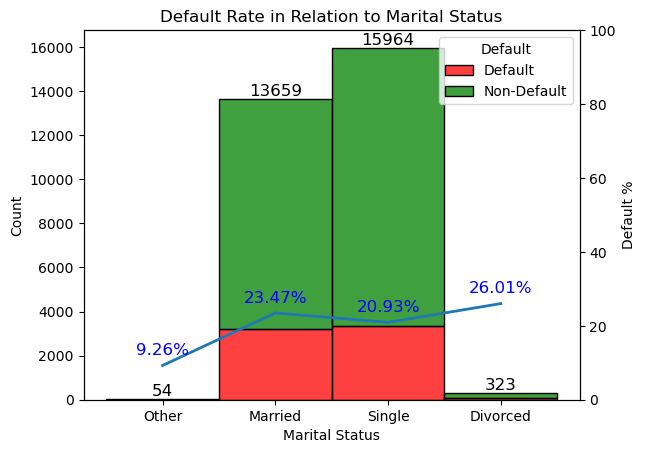

In [19]:
ax = sns.histplot(data=df, x='MARRIAGE', hue='default', multiple="stack", bins=bins, palette=['green', 'red'], discrete=True)
ax.set_title("Default Rate in Relation to Marital Status")
ax.legend(title='Default', labels=['Default', 'Non-Default'])
ax.set_xlabel('Marital Status')
ax.set_xticks([0,1, 2, 3])
ax.set_xticklabels(['Other','Married','Single', 'Divorced'])

grouped = df.groupby('MARRIAGE').size()
for x_val, total in grouped.items():
    ax.annotate(str(total), (x_val, total), ha='center',va='bottom', fontsize='12')

grouped_percentages = df.groupby(['MARRIAGE', 'default']).size().unstack(fill_value=0)
x_vals = grouped_percentages.index.tolist()
percentages = [(grouped_percentages.loc[x][1] / grouped_percentages.loc[x].sum()) * 100 if grouped_percentages.loc[x].sum() > 0 else 0 for x in x_vals]

ax2 = ax.twinx()
ax2.plot(x_vals, percentages, linewidth=2, label ='Default Percentage')
ax2.set_ylabel('Default %')
ax2.set_ylim(0, 100)

for x, pct in zip(x_vals, percentages):
        ax2.annotate(f'{pct:.2f}%',(x,pct + 2), ha='center', va='bottom', fontsize='12', color='blue')

Those who are married have a slightly higher chance to default, while those who are divocred have a higher chance beyond that, although, though, they are all somewhat close, it's hard to determine how significant it is. Additionally whatever falls under other has a really low default rate, but the sample size is small.

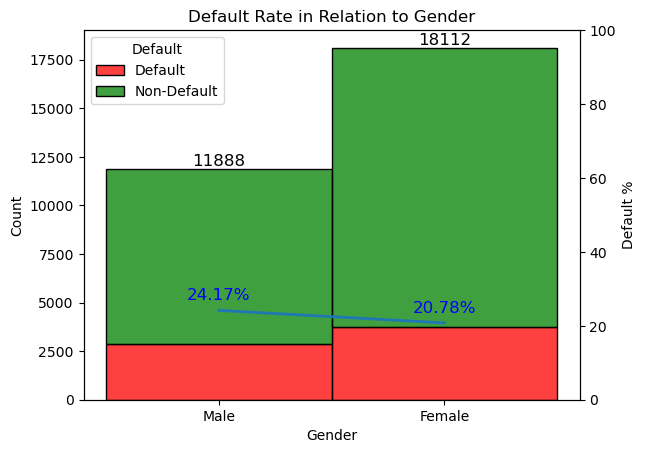

In [20]:
ax = sns.histplot(data=df, x='SEX', hue='default', multiple="stack", bins=bins, palette=['green', 'red'], discrete=True)
ax.set_title("Default Rate in Relation to Gender")
ax.legend(title='Default', labels=['Default', 'Non-Default'])
ax.set_xlabel('Gender')
ax.set_xticks([1, 2])
ax.set_xticklabels(['Male','Female'])

grouped = df.groupby('SEX').size()
for x_val, total in grouped.items():
    ax.annotate(str(total), (x_val, total), ha='center',va='bottom', fontsize='12')

grouped_percentages = df.groupby(['SEX', 'default']).size().unstack(fill_value=0)
x_vals = grouped_percentages.index.tolist()
percentages = [(grouped_percentages.loc[x][1] / grouped_percentages.loc[x].sum()) * 100 if grouped_percentages.loc[x].sum() > 0 else 0 for x in x_vals]

ax2 = ax.twinx()
ax2.plot(x_vals, percentages, linewidth=2, label ='Default Percentage')
ax2.set_ylabel('Default %')
ax2.set_ylim(0, 100)

for x, pct in zip(x_vals, percentages):
        ax2.annotate(f'{pct:.2f}%',(x,pct + 2), ha='center', va='bottom', fontsize='12', color='blue')

From this data, it would seem for the population, if this data was chosen at random, it would indicate that women are more likely to take out credit in Taiwan, additionally, men have a higher rate of defaulting on their loan.

C:\Users\manch\AppData\Local\Temp\ipykernel_11708\4143048213.py:17: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.histplot(data=subset, x='default', discrete=True, hue='default',palette=['green', 'red'], ax=ax)
C:\Users\manch\AppData\Local\Temp\ipykernel_11708\4143048213.py:17: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.histplot(data=subset, x='default', discrete=True, hue='default',palette=['green', 'red'], ax=ax)
C:\Users\manch\AppData\Local\Temp\ipykernel_11708\4143048213.py:17: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.histplot(data=subset, x='default', discrete=True, hue='default',palette=['green', 'red'], ax=ax)


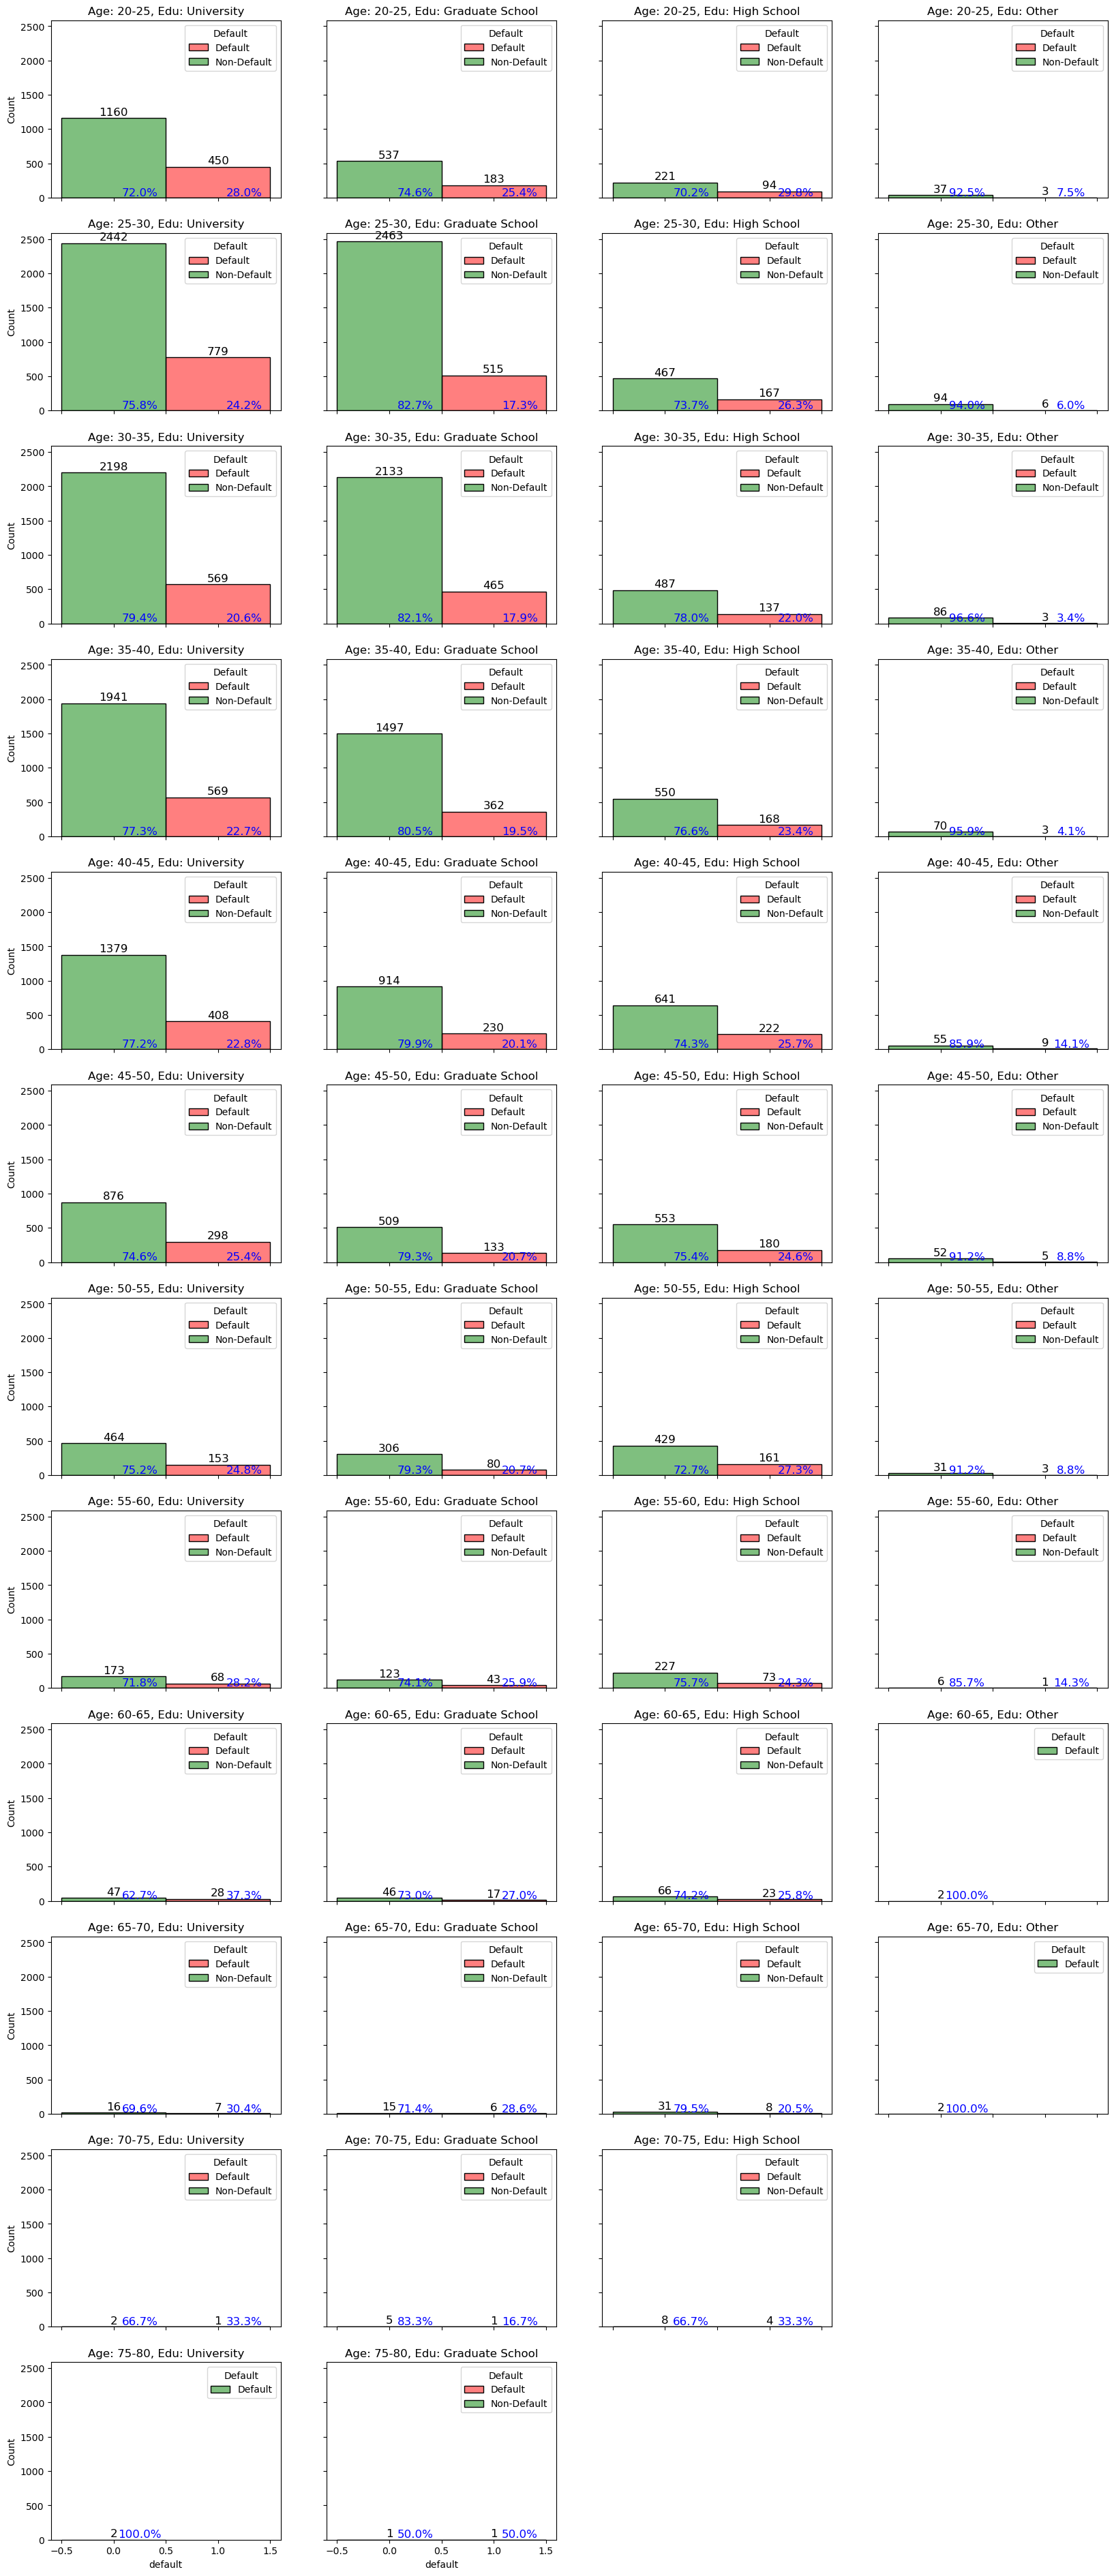

In [21]:
age_bins = df['AGE_binned'].unique().sort_values()
edu_levels = df['EDUCATION'].unique()
edu_labels = {
    1: 'Graduate School',
    2: 'University',
    3: 'High School',
    4: 'Other'
}
fig, axes = plt.subplots(len(age_bins), len(edu_levels), figsize=(20, len(age_bins) * 4), sharex=True, sharey=True)
for i, age_bin in enumerate(age_bins):
    for j, edu in enumerate(edu_levels):
        ax = axes[i, j]

        subset = df[(df['AGE_binned'] == age_bin) & (df['EDUCATION'] == edu)]

        if not subset.empty:
            sns.histplot(data=subset, x='default', discrete=True, hue='default',palette=['green', 'red'], ax=ax)
            ax.set_title(f'Age: {age_bin}, Edu: {edu_labels.get(edu, edu)}')
            ax.legend(title='Default', labels=['Default', 'Non-Default'])
            for p in ax.patches:
                if p.get_height() > 0:
                    ax.annotate(str(p.get_height()),(p.get_x() + p.get_width() / 2., p.get_height() + 10), ha='center', va='bottom', fontsize=12)
            for p in ax.patches:
                if p.get_height() > 0:
                    percentage = '{:.1f}%'.format(100 * p.get_height() / len(subset))
                    ax.annotate(percentage, ((p.get_x() + p.get_width() / 2.) + 0.25, 0), ha='center', va='bottom', fontsize=12, color='blue')      
        else:
            ax.set_visible(False)

Looking at the intersection of education and age, the two highest correlation demographic information, which are availible before giving the loan, everything seems consistent with the other assessments made about them individually, there aren't any large insights that was not already availible before. 

There aren't any groups that seem to have a particularly higher risk when looking at the subsets.